In [1]:
import numpy as np
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
import matplotlib
import json, math
from operator import sub
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

In [2]:
def get_aspect(ax):
    # Total figure size
    figW, figH = ax.get_figure().get_size_inches()
    # Axis size on figure
    _, _, w, h = ax.get_position().bounds
    # Ratio of display units
    disp_ratio = (figH * h) / (figW * w)
    # Ratio of data units
    # Negative over negative because of the order of subtraction
    data_ratio = sub(*ax.get_ylim()) / sub(*ax.get_xlim())

    return disp_ratio / data_ratio
    
def calculate_confidence_interval(data, confidence=.99):
    n = len(data)
    m = np.mean(data)
    std_dev = scipy.stats.sem(data)
    h = std_dev * scipy.stats.t.ppf((1 + confidence) / 2, n - 1)
    return [m, h]

In [3]:
v = '304'
diss_rate_target = 0.99
aoi_target = 0.01
num_runs = 10

In [4]:
def get_rdf_config_performance(n,i,q, max_gain = 0):
    diss_rate = []
    excess_probability = []

    #v = '303' if n >= 550 else '302'
    #v = '304'

    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_mg{max_gain}_r{r}.json', 'r') as f:
                data = json.load(f)
                diss_rate.append(data['avg_dissemination_rate'])
                excess_probability.append(data['excess_probability_1_R_peak'])
        except:
            errors += 1

    if errors == num_runs:
        return (0, 1, 0 ,0)

    (avg_diss_rate, diss_rate_ci) = calculate_confidence_interval(diss_rate)
    (excess_probability, excess_probability_ci) = calculate_confidence_interval(excess_probability)
    return (avg_diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)

In [5]:
nn = np.arange(100, 1000, 25)
i = 120
q = 200

pd = []
pd_nc_0 = []
pd_nc_50 = []
pe = []
pe_nc_0 = []
pe_nc_50 = []

pe_ci = []
pd_ci = []
pe_ci_0 = []
pd_ci_0 = []
pe_ci_50 = []
pd_ci_50 = []

for n in nn:
    avg_diss_rate, excess_probability, avg_diss_rate_ci, excess_probability_ci = get_rdf_config_performance(n,i,q, 100)
    pd.append(avg_diss_rate)
    pd_ci.append(avg_diss_rate_ci)
    pe.append(excess_probability)
    pe_ci.append(excess_probability_ci)
    avg_diss_rate, excess_probability, avg_diss_rate_ci, excess_probability_ci = get_rdf_config_performance(n,i,q, 50)
    pd_nc_50.append(avg_diss_rate)
    pd_ci_50.append(avg_diss_rate_ci)
    pe_nc_50.append(excess_probability)
    pe_ci_50.append(excess_probability_ci)
    avg_diss_rate, excess_probability, avg_diss_rate_ci, excess_probability_ci = get_rdf_config_performance(n,i,q, 30)
    pd_nc_0.append(avg_diss_rate)
    pd_ci_0.append(avg_diss_rate_ci)
    pe_nc_0.append(excess_probability)
    pe_ci_0.append(excess_probability_ci)


pd_nc_0 = np.array(pd_nc_0) * 100
pd_nc_50 = np.array(pd_nc_50) * 100
pd = np.array(pd) * 100
pe_nc_0 = np.array(pe_nc_0) * 100
pe_nc_50 = np.array(pe_nc_50) * 100
pe = np.array(pe) * 100
pe_ci = np.array(pe_ci) * 100
pd_ci = np.array(pd_ci) * 100
pe_ci_0 = np.array(pe_ci_0) * 100
pd_ci_0 = np.array(pd_ci_0) * 100
pe_ci_50 = np.array(pe_ci_50) * 100
pd_ci_50 = np.array(pd_ci_50) * 100

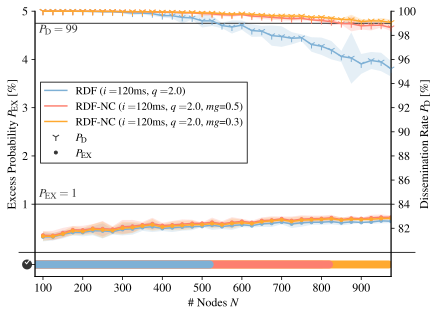

In [6]:
## Plot KPI comparison
ep_max = 5

rdf_color = '#7eb0d5'
rdf_nc_color_1 = '#fd7f6f'
rdf_nc_color_2 = '#ffa92f'

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x_max = 975

ax1.plot([40, x_max +60], [0,0], color='#333', lw=1, clip_on=False)
ax1.plot([50, x_max +20], [1,1], color='#333', lw=1)
ax1.text(90, 1.1, '$P_\mathrm{EX} = 1$', ha="left", va="bottom", color="#333", fontsize=12)

ax2.plot([50, x_max +20], [99, 99], color='#333', lw=1)
ax2.text(90, 98.9, '$P_\mathrm{D} = 99$', ha="left", va="top", color="#333", fontsize=12)

ax1.set_xlabel('\# Nodes $N$')
ax1.set_ylabel('Excess Probability $P_\mathrm{EX}$ [\%]')
cbf_max = 16
sf_max = 13
pf_max = 8

## RDF
ax1.plot(nn, pe, '.-', color=rdf_color)
ax1.fill_between(nn, pe-pe_ci, pe+pe_ci, facecolor=rdf_color, interpolate=True, alpha=0.2)

## RDF NC
ax1.plot(nn, pe_nc_0, '.-', color=rdf_nc_color_1)
ax1.fill_between(nn, pe_nc_0-pe_ci_0, pe_nc_0+pe_ci_0, facecolor=rdf_nc_color_1, interpolate=True, alpha=0.2)
ax1.plot(nn, pe_nc_50, '.-', color=rdf_nc_color_2)
ax1.fill_between(nn, pe_nc_50-pe_ci_50, pe_nc_50+pe_ci_50, facecolor=rdf_nc_color_2, interpolate=True, alpha=0.2)

ax1.tick_params(axis='y')
ax1.set_ylim(-0.5, ep_max * 1.0)
ax1.set_xlim(80, x_max)
ax1.set_yticks([-0.25] + list(np.arange(1, ep_max + 1, 1)))
ax1.set_yticklabels([''] + list(range(1, ep_max + 1)))

ax2.set_ylabel('Dissemination Rate $P_\mathrm{D}$ [\%]')

ax2.plot(nn, pd, '1-', ms=8, color=rdf_color, clip_on=False)
ax2.fill_between(nn, pd - pd_ci, pd + pd_ci, facecolor=rdf_color, interpolate=True, alpha=0.2)

ax2.plot(nn, pd_nc_0, '1-', ms=8, color=rdf_nc_color_1, clip_on=False)
ax2.fill_between(nn, pd_nc_0 - pd_ci_0, pd_nc_0 + pd_ci_0, facecolor=rdf_nc_color_1, interpolate=True, alpha=0.2)

ax2.plot(nn, pd_nc_50, '1-', ms=8, color=rdf_nc_color_2, clip_on=False)
ax2.fill_between(nn, pd_nc_50 - pd_ci_50, pd_nc_50 + pd_ci_50, facecolor=rdf_nc_color_2, interpolate=True, alpha=0.2)


n_max_rdf = 0
n_max_nc_rdf_0 = 0
n_max_nc_rdf_50 = 0
# n_max_sf = 0
# n_max_pf = 0

for idx in range(len(nn)):
    n = nn[idx]
    rdf_ep_target_met = pe[idx] <= aoi_target * 100
    rdf_dr_target_met = pd[idx] >= diss_rate_target * 100
    rdf_nc_0_ep_target_met = pe_nc_0[idx] <= aoi_target * 100
    rdf_nc_0_target_met = pd_nc_0[idx] >= diss_rate_target * 100
    rdf_nc_50_ep_target_met = pe_nc_50[idx] <= aoi_target * 100
    rdf_nc_50_target_met = pd_nc_50[idx] >= diss_rate_target * 100

    if rdf_ep_target_met and rdf_dr_target_met:
        n_max_rdf = n
        
    if rdf_nc_0_ep_target_met and rdf_nc_0_target_met:
        n_max_nc_rdf_0 = n

    if rdf_nc_50_ep_target_met and rdf_nc_50_target_met:
        n_max_nc_rdf_50 = n



ax1aspect = get_aspect(ax1)
circle_width = 25
circle_center = 60
t1 = matplotlib.patches.Ellipse((circle_center ,-0.25), width=circle_width, height=circle_width / ax1aspect, fill=True, fc='#333', lw=0, ec='#fff', clip_on=False)
ax1.add_patch(t1)
check_x = circle_center + np.array([-2.3, -0.6, 3]) * 1.9
check_y = (np.array([-12.39882697947214, -14.382639296187682, -9.919061583577713]) *2 / ax1aspect) 
ax1.plot(check_x, check_y, color='#fff', lw=1, clip_on=False)

cap_offset = 6
ax1.plot([0, 800], [-0.25, -0.25], color='#ebebeb', solid_capstyle='round', lw=8)   
ax1.plot([0, n_max_nc_rdf_50-cap_offset], [-0.25, -0.25], color=rdf_nc_color_2, solid_capstyle='round', lw=8) #, linestyle=(2, (2, 2))
ax1.plot([0, n_max_nc_rdf_0-cap_offset], [-0.25, -0.25], color=rdf_nc_color_1, solid_capstyle='round', lw=8)
ax1.plot([0, n_max_rdf -cap_offset], [-0.25, -0.25], color=rdf_color, solid_capstyle='round', lw=8)

# tick_height = 0.07
# for n in nn:
#     ax1.plot([n,n],[-0.25-tick_height, -0.25+tick_height], color='#333', lw=0.5)


ax2.tick_params(axis='y')
ax2.set_ylim(78, 100)
ax2.set_xlim(80, x_max)
ax2.set_yticks(np.arange(82, 101, 2))
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)

plt.plot([-1],[0], label=f'RDF ($i=${i}ms, $q=${q/100})', color=rdf_color)
plt.plot([-1],[0], label=f'RDF-NC ($i=${i}ms, $q=${q/100}, $mg$=0.5)', color=rdf_nc_color_1)
plt.plot([-1],[0], label=f'RDF-NC ($i=${i}ms, $q=${q/100}, $mg$=0.3)', color=rdf_nc_color_2)
# plt.plot([-1],[0], label=f'CBF ($i=${i_cbf}ms)', color=cbf_color)
# plt.plot([-1],[0], label=f'SF ($i=${i_sf}ms, $p=${p/100})', color=sf_color)
# plt.plot([-1],[0], label=f'PF ($i=${i_pf}ms)', color=pf_color)
plt.plot([-1],[0], '1', ms=8, label='$P_\mathrm{D}$', color='#333')
plt.plot([-1],[0], '.',label='$P_\mathrm{EX}$', color='#333')
leg = plt.legend(fancybox=False, framealpha=1.0, loc=6, bbox_to_anchor=(0, 0.58), prop={'size': 11}) #loc=7, 
leg.get_frame().set_edgecolor('#333')

fig.savefig(f"../figures/nc_single_config_performance_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/nc_single_config_performance_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)

plt.show()